In [ ]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
from maze_env import Maze
from utils import plot_policy, plot_action_values, test_agent


%matplotlib inline

c:\Users\mohdm\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


### Initializing the environment

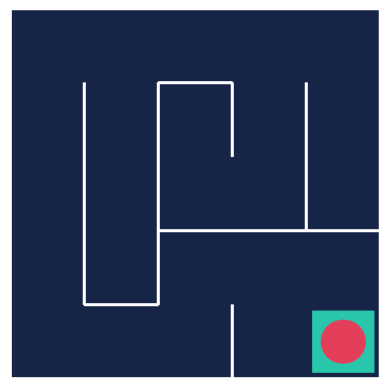

In [2]:
env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)


In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s,s)$

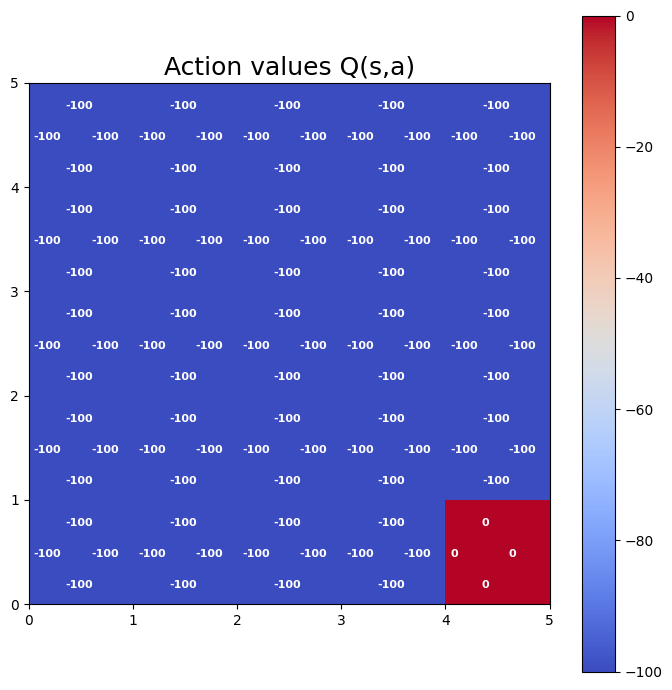

In [5]:
action_values = np.full((5,5,4), -100)  # 5 x 5 x 4 because 25 states and 4 actions
action_values[4,4,:] = 0.

plot_action_values(action_values)

## Define the target policy $\pi(s)$

### Create the policy $\pi(s)$

In [6]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

### Test the policy with state (0,0)

In [7]:
action = target_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


### Plot the policy

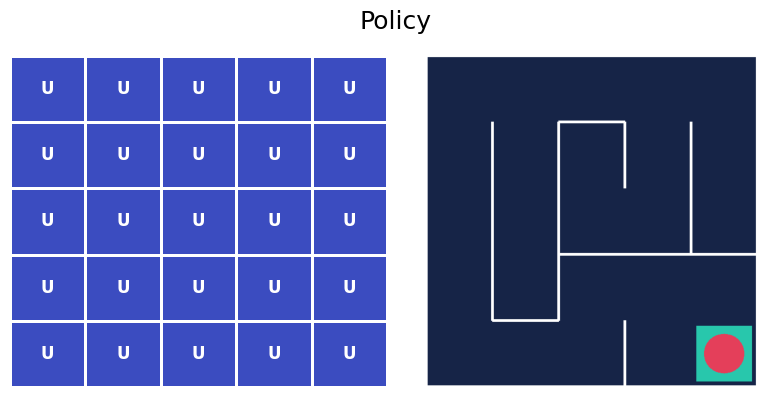

In [8]:
plot_policy(action_values, frame)

## Define the exploratory policy $b(s)$

### Create the policy $b(s)$

In [9]:
def exploratory_policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

### Test the policy with state (0,0)

In [10]:
action = exploratory_policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 3


### Plot the policy

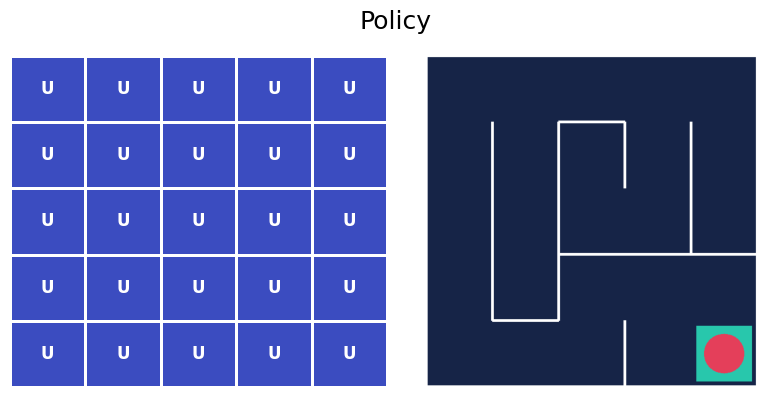

In [11]:
plot_policy(action_values, frame)

## Implement the algorithm

In [12]:
def off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes, gamma=0.99, epsilon=0.2):

    for episode in range(1, episodes + 1):
        G = 0
        W = 1
        csa = np.zeros((5, 5, 4))
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W / csa[state_t][action_t]) * (G - qsa)

            if action_t != target_policy(state_t):
                break

            W = W * 1. / (1 - epsilon + epsilon/4)

In [13]:
off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes=1000, epsilon=0.3)

## Show Results

### Show resulting value table $Q(s,s)$

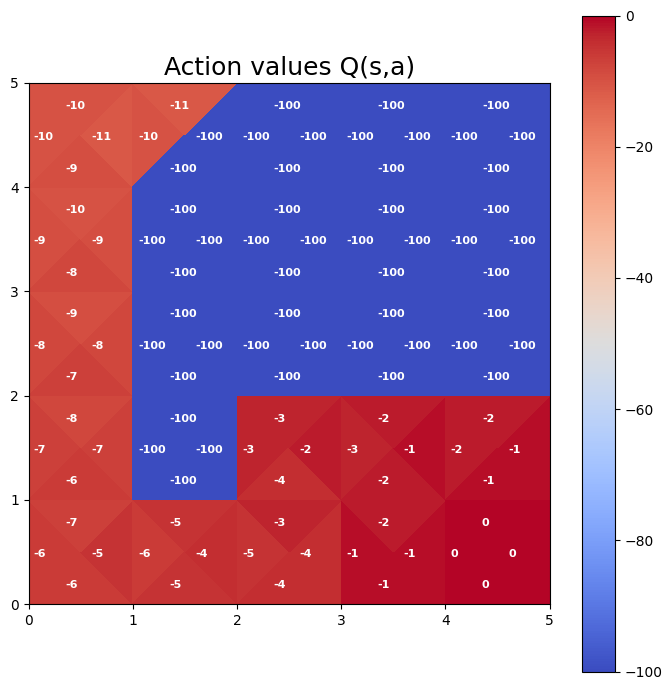

In [14]:
plot_action_values(action_values)

Each small triangle inside a grid cell shows the expected reward (Q-value) for taking a specific action from that state.

## Show resulting value policy $\pi(.|s)$

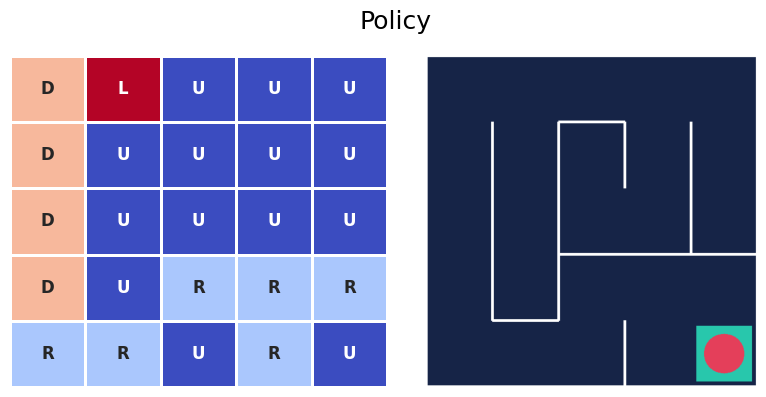

In [15]:
plot_policy(action_values, frame)

## Test the agent

In [ ]:
test_agent(env, target_policy)